# Beer Consumption 예측 using RNN

## 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')
df.head(2)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972


In [3]:
df.tail(2)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 전처리

In [4]:
df.info()
#Index : 941인데, non-null 갯수를 보면 분명 null값이 있다는 소리다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


In [5]:
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [7]:
#날짜 컬럼 datetime 변환
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
#format YYMMDD 변환 가능

print(df.dtypes)
df.head()

Data                           datetime64[ns]
Temperatura Media (C)                  object
Temperatura Minima (C)                 object
Temperatura Maxima (C)                 object
Precipitacao (mm)                      object
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [8]:
# ,를 .으로
df.replace(regex=True, to_replace=',',value='.', inplace=True)

In [9]:
# object -> numeric
df['Temperatura Media (C)']=pd.to_numeric(df['Temperatura Media (C)'])
df['Temperatura Maxima (C)']=pd.to_numeric(df['Temperatura Maxima (C)'])
df['Temperatura Minima (C)']=pd.to_numeric(df['Temperatura Minima (C)'])
df['Precipitacao (mm)'] = pd.to_numeric(df['Precipitacao (mm)'])

In [10]:
print(df.dtypes)
df.head(2)

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972


In [11]:
# df.set_index(df['Data'], inplace=True) 이렇게하면 컬럼은 그대로 있음
# 아래 형태로. 컬럼 명만 지정해주면 됨
df.set_index('Data', inplace=True) 
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


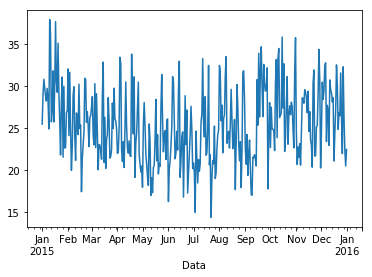

In [12]:
df['Consumo de cerveja (litros)'].plot()

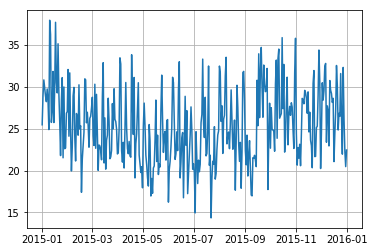

In [13]:
plt.plot(df['Consumo de cerveja (litros)'])
plt.grid()
plt.show()
plt.close()

## 3. Train, Test set 분리

train, test 분리 - scale - RNN

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.layers import RNN
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from math import sqrt

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


callback 딥 다이브

In [15]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}): 
        self.losses.append(logs.get('loss'))

In [16]:
x = df.drop(columns='Consumo de cerveja (litros)')
y = df[['Consumo de cerveja (litros)']]
x.head(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
Data,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0
2015-01-02,27.02,24.5,33.5,0.0,0.0


In [17]:
y.head(2)

,Consumo de cerveja (litros)
Data,
2015-01-01,25.461
2015-01-02,28.972


In [18]:
# 80%는 train데이터로, 나머지는 test 데이터로.
X_train = x[:int(len(x) * 80 / 100)]
y_train = y[:int(len(y) * 80 / 100)]
X_test = x[int(len(x) * 80 / 100) :]
y_test = y[int(len(y) * 80 / 100) :]

In [19]:
X_train.head(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
Data,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0
2015-01-02,27.02,24.5,33.5,0.0,0.0


In [20]:
y_train.head(2)

,Consumo de cerveja (litros)
Data,
2015-01-01,25.461
2015-01-02,28.972


## 4. Scale

In [21]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [22]:
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [23]:
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## 5. RNN

Window 함수를 사용하기 위해 df 형태로 변환

In [24]:
X_train = pd.DataFrame(X_train, columns=x.columns, index=x.index[0:292])
X_test = pd.DataFrame(X_test, columns=x.columns, index=x.index[292:])

y_train = pd.DataFrame(y_train, columns=y.columns, index=y.index[0:292])
y_test = pd.DataFrame(y_test, columns=y.columns, index=y.index[292:])

In [25]:
def dataset_reshape(dataset, window_size=1):
    data = []
    for i in range(len(dataset) - window_size - 1):
        change_data = dataset[i:(i+window_size)]  #한칸씩 밀려남.
        data.append(np.array(change_data))       
    return np.array(data)

for using RNN, df 형태를 array형태로 변환

* y_train = dataset_reshape(y_train['Consumo de cerveja (litros)'], 5) # (286, 5)
* y_train = dataset_reshape(y_train, 5) # (286, 5, 1)
* 형태비교

In [26]:
y_train['Consumo de cerveja (litros)'][0:5]

Data
2015-01-01    0.471221
2015-01-02    0.620031
2015-01-03    0.698101
2015-01-04    0.655082
2015-01-05    0.616979
Name: Consumo de cerveja (litros), dtype: float64

In [27]:
y_train[0:5]

,Consumo de cerveja (litros)
Data,
2015-01-01,0.471221
2015-01-02,0.620031
2015-01-03,0.698101
2015-01-04,0.655082
2015-01-05,0.616979


In [28]:
np.array(y_train['Consumo de cerveja (litros)'][0:5])

array([0.4712215 , 0.62003052, 0.69810121, 0.6550818 , 0.61697889])

In [29]:
np.array(y_train[0:5])

array([[0.4712215 ],
       [0.62003052],
       [0.69810121],
       [0.6550818 ],
       [0.61697889]])

In [30]:
X_train = dataset_reshape(X_train, 5)   
y_train = dataset_reshape(y_train['Consumo de cerveja (litros)'], 5) # (286, 5)
# y_train = dataset_reshape(y_train, 5) # (286, 5, 1)

X_test = dataset_reshape(X_test, 5) 
y_test = dataset_reshape(y_test['Consumo de cerveja (litros)'], 5) # (67, 5)
# y_test = dataset_reshape(y_test, 5) # (67, 5, 1)

# y_test = dataset_reshape(y_test, 5) 이렇게 안 한 이유는?
## 차원이 달라진다. 

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 5, 5)
(286, 5)
(67, 5, 5)
(67, 5)


In [32]:
X_train

array([[[0.90225564, 0.95683453, 0.81818182, 0.        , 0.        ],
        [0.88471178, 1.        , 0.86363636, 0.        , 0.        ],
        [0.74686717, 0.84892086, 0.7       , 0.        , 1.        ],
        [0.69423559, 0.78417266, 0.64090909, 0.014068  , 1.        ],
        [0.68421053, 0.74820144, 0.62727273, 0.        , 0.        ]],

       [[0.88471178, 1.        , 0.86363636, 0.        , 0.        ],
        [0.74686717, 0.84892086, 0.7       , 0.        , 1.        ],
        [0.69423559, 0.78417266, 0.64090909, 0.014068  , 1.        ],
        [0.68421053, 0.74820144, 0.62727273, 0.        , 0.        ],
        [0.68170426, 0.68345324, 0.72727273, 0.14302462, 0.        ]],

       [[0.74686717, 0.84892086, 0.7       , 0.        , 1.        ],
        [0.69423559, 0.78417266, 0.64090909, 0.014068  , 1.        ],
        [0.68421053, 0.74820144, 0.62727273, 0.        , 0.        ],
        [0.68170426, 0.68345324, 0.72727273, 0.14302462, 0.        ],
        [0.69548

In [33]:
y_train

array([[0.4712215 , 0.62003052, 0.69810121, 0.6550818 , 0.61697889],
       [0.62003052, 0.69810121, 0.6550818 , 0.61697889, 0.58807324],
       [0.69810121, 0.6550818 , 0.61697889, 0.58807324, 0.6522421 ],
       ...,
       [0.85415784, 0.50461982, 0.51623294, 0.52767653, 0.91201153],
       [0.50461982, 0.51623294, 0.52767653, 0.91201153, 0.55285242],
       [0.51623294, 0.52767653, 0.91201153, 0.55285242, 0.77659574]])

In [34]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

#np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(100, input_shape=(5, 5)))
model.add(Dense(5, activation="linear"))
model.add(Dense(5, activation="relu"))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = LossHistory() 
history.init()

hist = model.fit(X_train, y_train, epochs=90,batch_size=10, verbose=2,shuffle=False, callbacks=[history], validation_data=(X_test,y_test))
# print("Training Done! loss : %.4f  val_loss : %.4f"%(hist.history['loss'][-1],hist.history['val_loss'][-1]))

Train on 286 samples, validate on 67 samples
Epoch 1/90
 - 0s - loss: 0.0810 - acc: 0.2378 - val_loss: 0.0236 - val_acc: 0.3284
Epoch 2/90
 - 0s - loss: 0.0231 - acc: 0.4580 - val_loss: 0.0185 - val_acc: 0.3881
Epoch 3/90
 - 0s - loss: 0.0175 - acc: 0.5140 - val_loss: 0.0166 - val_acc: 0.5373
Epoch 4/90
 - 0s - loss: 0.0163 - acc: 0.5420 - val_loss: 0.0157 - val_acc: 0.5522
Epoch 5/90
 - 0s - loss: 0.0154 - acc: 0.5664 - val_loss: 0.0152 - val_acc: 0.5672
Epoch 6/90
 - 0s - loss: 0.0149 - acc: 0.5769 - val_loss: 0.0149 - val_acc: 0.5672
Epoch 7/90
 - 0s - loss: 0.0146 - acc: 0.5734 - val_loss: 0.0147 - val_acc: 0.5970
Epoch 8/90
 - 0s - loss: 0.0144 - acc: 0.5594 - val_loss: 0.0145 - val_acc: 0.5970
Epoch 9/90
 - 0s - loss: 0.0143 - acc: 0.5664 - val_loss: 0.0143 - val_acc: 0.5672
Epoch 10/90
 - 0s - loss: 0.0141 - acc: 0.5629 - val_loss: 0.0143 - val_acc: 0.5075
Epoch 11/90
 - 0s - loss: 0.0138 - acc: 0.5699 - val_loss: 0.0142 - val_acc: 0.5224
Epoch 12/90
 - 0s - loss: 0.0134 - acc: 

## 6. 시각화 및 성능평가

No handles with labels found to put in legend.


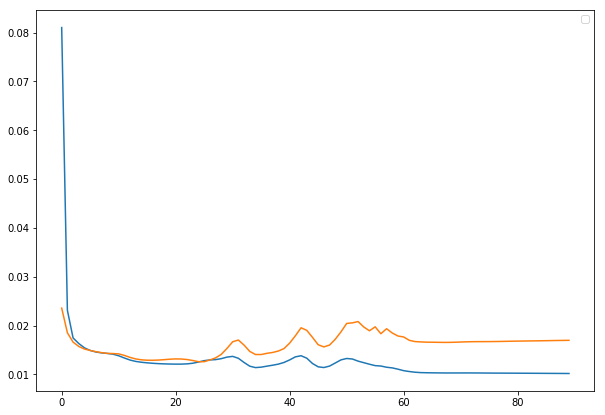

In [35]:
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend()
#plt.ylim(0.02,0.15)

plt.show()

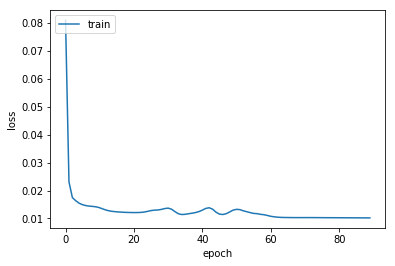

67/67 [==============================] - 0s 45us/step
Test RMSE: 0.130


In [36]:
# 학습 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model.evaluate(X_test, y_test)
yhat = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

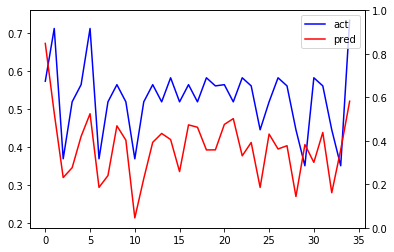

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], 
                y_test[4], y_test[5], y_test[6])
y_hat_tuple = (yhat[0], yhat[1], yhat[2], 
               yhat[3], yhat[4], yhat[5], yhat[6])
acc_ax = loss_ax.twinx()
y_value = y['Consumo de cerveja (litros)'][-len(yhat):]
loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(np.concatenate(y_hat_tuple), 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper right')

plt.show()
